In [1]:
import hmftpy as hmf
from hmftpy.plaquettes.triangular import plaq12, plaq12z, plaq9p, plaq9d, plaq3
from hmftpy.operators import mf_ops, inner_hamiltonian, periodic_hamiltonian
from hmftpy import do_hmft
from hmftpy.hmf import get_mfs
from hmftpy.plot_spins import draw_tri_lattice, draw_cluster, plot_spins
from quspin.basis import spin_basis_1d
from quspin.operators import quantum_operator
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

plaq = plaq12
L = plaq['L']
basis = spin_basis_1d(L, pauli=0)

ops = hmf.operators.mf_ops(plaq, basis)
maxit=100

In [2]:
def couplings_r(alpha):
    r_nn = np.sqrt(3)
    r_nnn = 2
    interactions = {'local': {},
                    'nearest': {'xx': 1, 'yy': 1, 'zz': 0},
                    'n_nearest': {'xx': np.sqrt(3)**-alpha, 'yy': np.sqrt(3)**-alpha, 'zz': 0},
                    'n_n_nearest': {'xx': 2**-alpha, 'yy': 2**-alpha, 'zz': 0}}
    return interactions

In [3]:
steps = 20
alphas_1 = np.linspace(0, 1.5, steps)
alphas_2 = np.linspace(6, 3, steps)
alphas = np.concatenate([alphas_1, alphas_2[::-1]])
energies_1 = np.zeros(steps)
energies_2 = np.zeros(steps)
energies_ed = np.zeros(2*steps)
cvgs_1 = [False for i in range(steps)]
cvgs_2 = [False for i in range(steps)]

In [4]:
mfs_1 = [None for i in range(steps)]
mf0 = None
for i, alpha in enumerate(tqdm(alphas_1)):
    interactions = couplings_r(alpha)
    if i != 0:
        mf0 = mfs_1[i-1]
    energies_1[i], v, mfs_1[i], cvgs_1[i] = do_hmft(plaq, interactions, basis, 
                                            max_iter=maxit, mf0=mf0,
                                            ops=ops,
                                            mf_cvg=False, every_other=True,
                                          hmft_tol=10**-10)

100%|██████████| 20/20 [06:05<00:00, 18.27s/it]


In [5]:
mfs_2 = [None for i in range(steps)]
mf0 = None
alphas_2 = np.linspace(10, 3, steps)
for i, alpha in enumerate(tqdm(alphas_2)):
    interactions = couplings_r(alpha)
    if i != 0:
        mf0 = mfs_2[i-1]
    energies_2[i], v, mfs_2[i], cvgs_2[i] = do_hmft(plaq, interactions, basis, 
                                            max_iter=maxit, mf0=mf0,
                                            ops=ops,
                                            mf_cvg=False, every_other=True,
                                          hmft_tol=10**-10)

100%|██████████| 20/20 [01:31<00:00,  4.60s/it]


In [6]:
alphas_3 = np.linspace(1, 3, steps)
energies_3 = np.zeros(steps)
cvgs_3 = [False for i in range(steps)]
mfs_3 = [None for i in range(steps)]
for i, alpha in enumerate(tqdm(alphas_3)):
    interactions = couplings_r(alpha)
    hp = periodic_hamiltonian(plaq, interactions, basis, every_other=True)
    e, v = hp.eigsh(k=1, which='SA')
    mf0 = get_mfs(v[:,0], ops)
    energies_3[i], v, mfs_3[i], cvgs_3[i] = do_hmft(plaq, interactions, basis, 
                                            max_iter=200, mf0=mf0,
                                            ops=ops,
                                            mf_cvg=False, every_other=True,
                                          hmft_tol=10**-10)

100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


In [7]:
alphas_ed = np.linspace(0, 10, 2*steps)
for i, alpha in enumerate(tqdm(alphas_ed)):
    interactions = couplings_r(alpha)
    h = inner_hamiltonian(plaq, interactions, basis, every_other=True)
    e, v = h.eigsh(k=1, which='SA')
    energies_ed[i] = e[0]

100%|██████████| 40/40 [00:14<00:00,  2.68it/s]


Text(0, 0.5, '$E$')

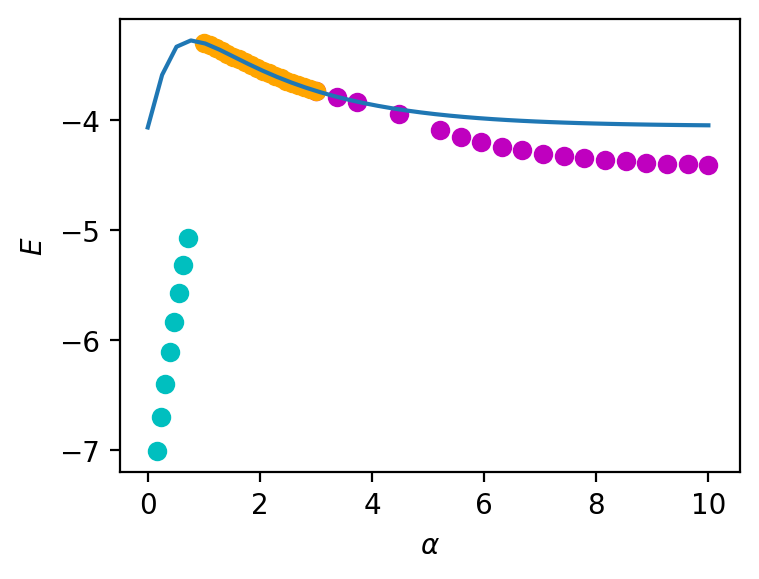

In [12]:
plt.figure(figsize=(4,3), dpi=200)
plt.plot(alphas_ed, energies_ed)
plt.scatter(alphas_2[cvgs_2], energies_2[cvgs_2], color='m')
plt.scatter(alphas_1[cvgs_1], energies_1[cvgs_1], color='c')
plt.scatter(alphas_3, energies_3, color='orange')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$E$')

Text(0, 0.5, '$E$')

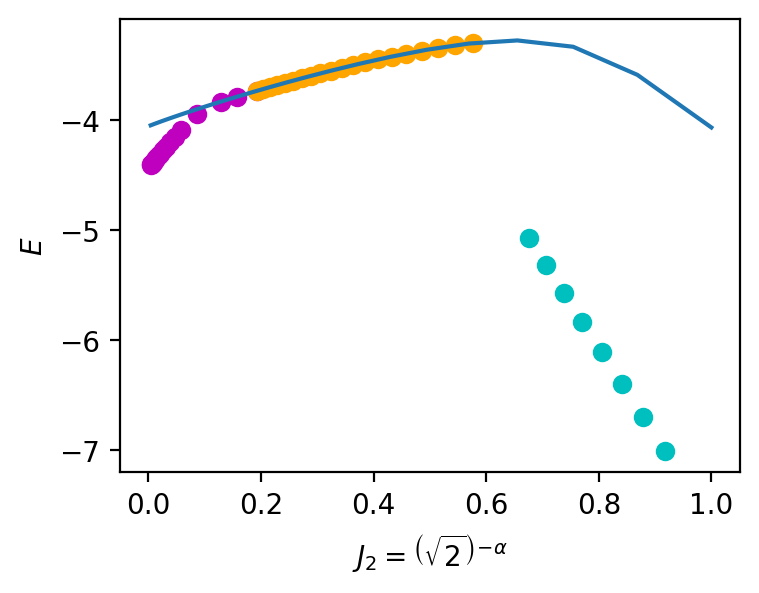

In [15]:
plt.figure(figsize=(4,3), dpi=200)
plt.plot(np.sqrt(3)**-alphas_ed, energies_ed)
plt.scatter(np.sqrt(3)**-alphas_2[cvgs_2], energies_2[cvgs_2], color='m')
plt.scatter(np.sqrt(3)**-alphas_1[cvgs_1], energies_1[cvgs_1], color='c')
plt.scatter(np.sqrt(3)**-alphas_3, energies_3, color='orange')
plt.xlabel(r'$J_2 = \left(\sqrt{2}\right)^{-\alpha}$')
plt.ylabel(r'$E$')